### Laboratorium 5 - zadania - transformacja Hougha

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#### Zadanie 1

Zbadaj wpływ parametrów transformacji Hougha na jakość detekcji prostych na przykładzie obrazu `norway`. Wykorzystaj ulubiony detektor krawędzi i zaprezentuj wyniki pośrednie przed użyciem transformacji Hougha. Zapoznaj się z dokumentacją funkcji [`cv2.HoughLines`](https://docs.opencv.org/4.5.3/dd/d1a/group__imgproc__feature.html#ga46b4e588934f6c8dfd509cc6e0e4545a), zwłaszcza parametrami sterującymi rozdzielczością `rho`, `theta` oraz progiem `threshold`.

Zacznij od znalezienia odpowiednich parametrów detektora krawędzi - jeśli na tym etapie wyniki będą słabe, to dalej będzie tylko gorzej (_garbage-in, garbage-out_) - ale nie skupiaj się na badaniu ich wpływu na wyniki.

Ostateczny rezultat zaprezentuj w postaci odcinków naniesionych na kopię obrazu wejściowego (patrz komórka `[3]`).

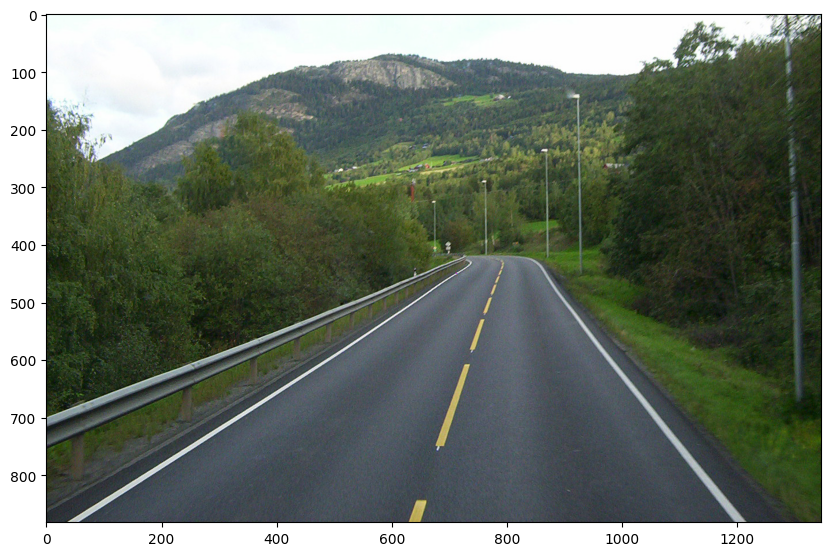

In [2]:
norway = cv2.imread('norway.jpg')
plt.subplots(1, 1, figsize=(10,10))[1].imshow(norway[..., ::-1]);

In [3]:
def rhotheta2xy(line):
    # konwersja parametrów prostej w układzie rho-theta do odcinka w układzie kartezjańskim
    # wynik można użyć jako argumenty funkcji cv2.line
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 5000*(-b))
    y1 = int(y0 + 5000*(a))
    x2 = int(x0 - 5000*(-b))
    y2 = int(y0 - 5000*(a))
    return x1, y1, x2, y2

Rozwiązanie:

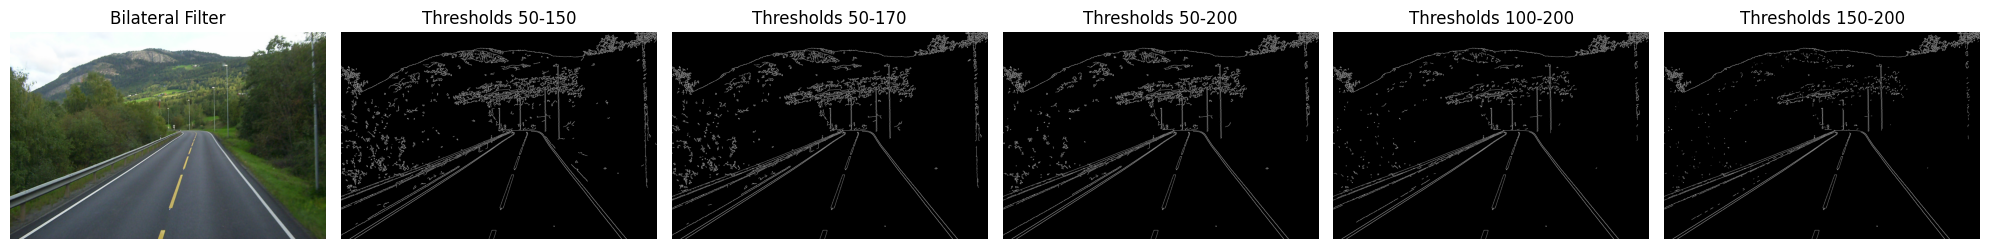

In [4]:
bilateral_filtered = cv2.bilateralFilter(norway, 7, 50, 50)

thresholds = [(50, 150), (50, 170), (50, 200), (100, 200), (150, 200)]

bilateral_results = [cv2.Canny(bilateral_filtered, low, high) for low, high in thresholds]

fig, axs = plt.subplots(1, len(thresholds) + 1, figsize=(20, 5))

axs[0].imshow(cv2.cvtColor(bilateral_filtered, cv2.COLOR_BGR2RGB))
axs[0].set_title('Bilateral Filter')
axs[0].axis('off')

for i, (edges, (low, high)) in enumerate(zip(bilateral_results, thresholds)):
    axs[i + 1].imshow(edges, cmap='gray')
    axs[i + 1].set_title(f'Thresholds {low}-{high}')
    axs[i + 1].axis('off')

plt.tight_layout()
plt.show()

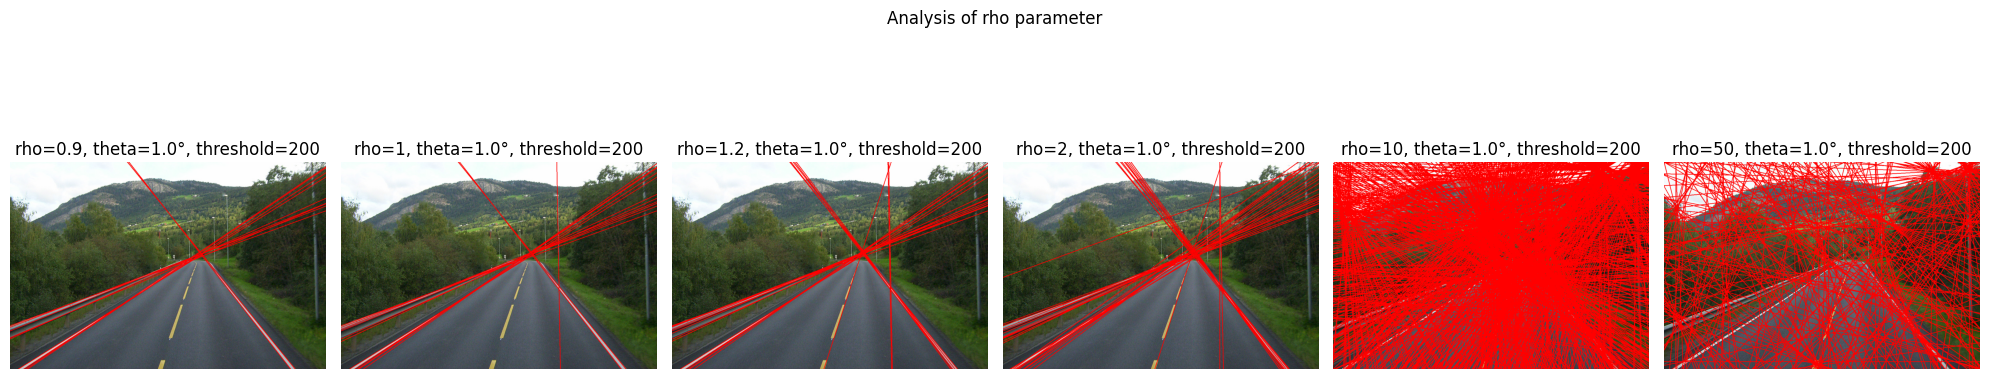

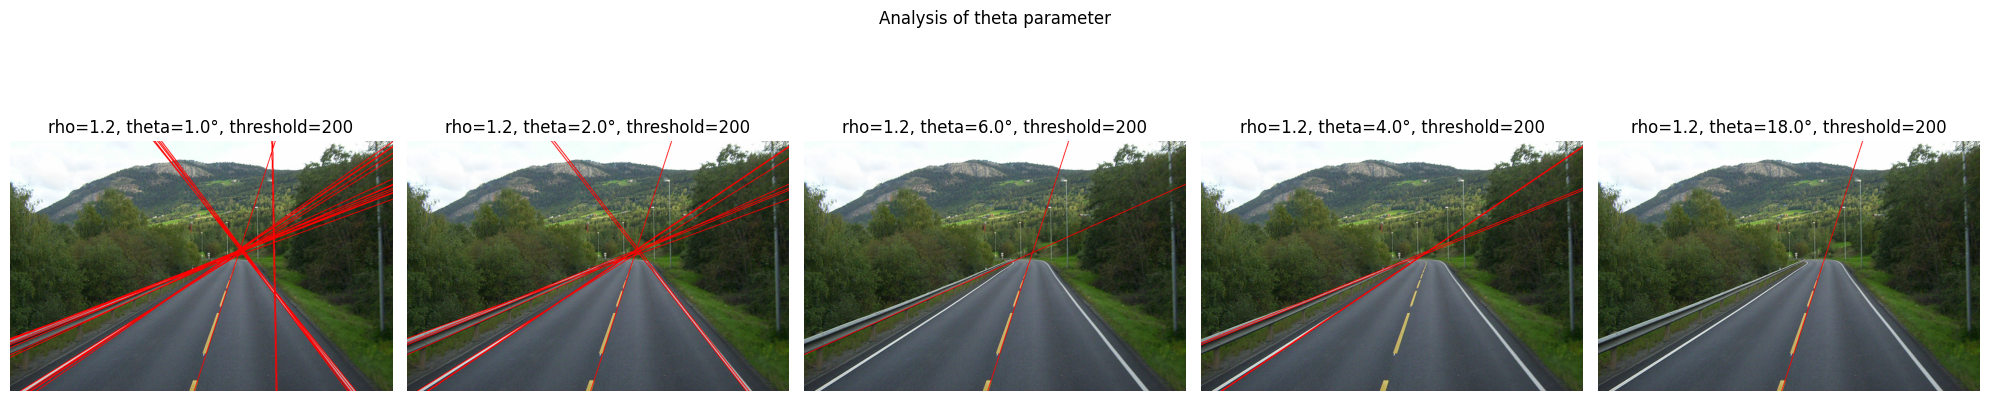

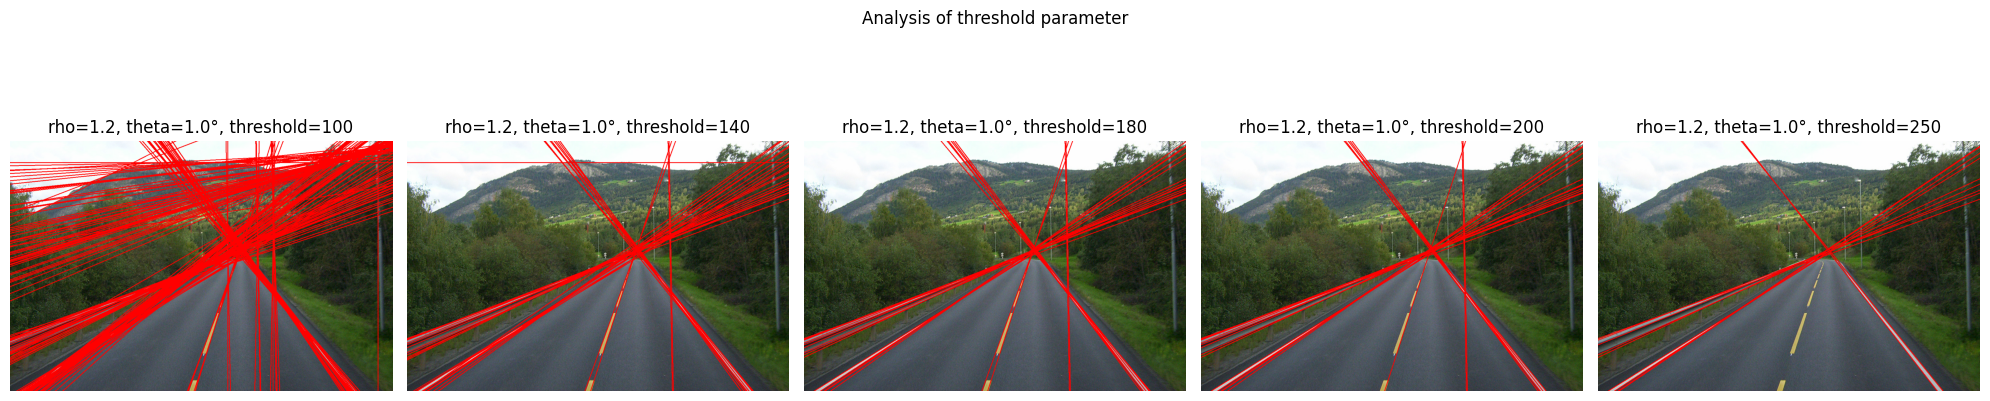

In [6]:
gray_image = cv2.cvtColor(norway, cv2.COLOR_BGR2GRAY)

bilateral_filtered = cv2.bilateralFilter(gray_image, 7, 50, 50)

edges = cv2.Canny(bilateral_filtered, 80, 150)

rho_values = [0.9, 1, 1.2, 2, 10, 50 ]
theta_values = [np.pi/180, np.pi/90, np.pi/30, np.pi/45, np.pi/10]
threshold_values = [100, 140, 180, 200, 250]

def apply_hough_transform(rho, theta, threshold, edges, original_image, ax):
    lines = cv2.HoughLines(edges, rho, theta, threshold)
    image_with_lines = np.copy(original_image)

    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = rhotheta2xy(line)
            cv2.line(image_with_lines, (x1, y1), (x2, y2), (0, 0, 255), 2)

    ax.imshow(cv2.cvtColor(image_with_lines, cv2.COLOR_BGR2RGB))
    ax.set_title(f'rho={rho}, theta={theta*180/np.pi}°, threshold={threshold}')
    ax.axis('off')


fig, axs = plt.subplots(1, len(rho_values), figsize=(20, 5))
for i, rho in enumerate(rho_values):
    apply_hough_transform(rho,np.pi/180,200, edges, norway, axs[i])
plt.suptitle('Analysis of rho parameter')
plt.tight_layout()
plt.show()

fig, axs = plt.subplots(1, len(theta_values), figsize=(20, 5))
for i, theta in enumerate(theta_values):
    apply_hough_transform(1.2, theta, 200, edges, norway, axs[i])
plt.suptitle('Analysis of theta parameter')
plt.tight_layout()
plt.show()

fig, axs = plt.subplots(1, len(threshold_values), figsize=(20, 5))
for i, threshold in enumerate(threshold_values):
    apply_hough_transform(1.2, np.pi/180, threshold, edges, norway, axs[i])
plt.suptitle('Analysis of threshold parameter')
plt.tight_layout()
plt.show()

#### Zadanie 2

Dany jest obraz `pillbox`. Wykorzystaj transformację Hougha dla prostych, aby wykryć krawędzie między komórkami organizera.

Dla odmiany, w tym zadaniu nie jest istotne badanie parametrów ale wyłącznie końcowy wynik.

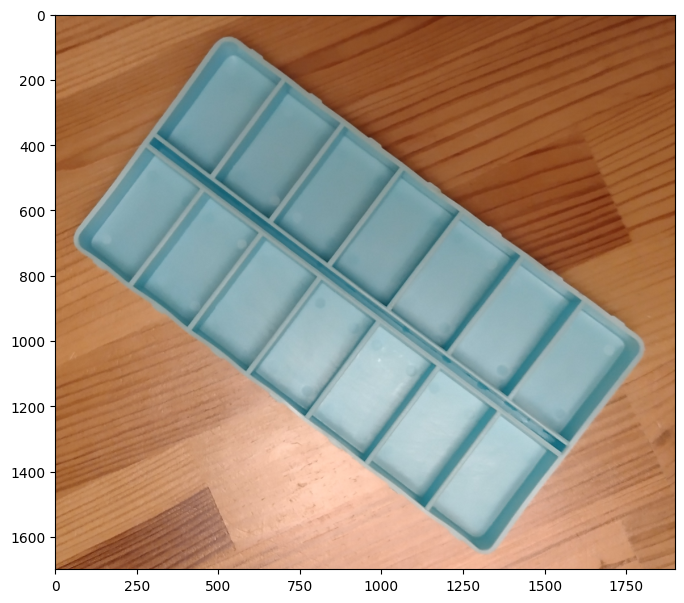

In [190]:
pillbox = cv2.imread('pillbox.png')
plt.subplots(1, 1, figsize=(8,8))[1].imshow(pillbox[..., ::-1]);

Rozwiązanie:

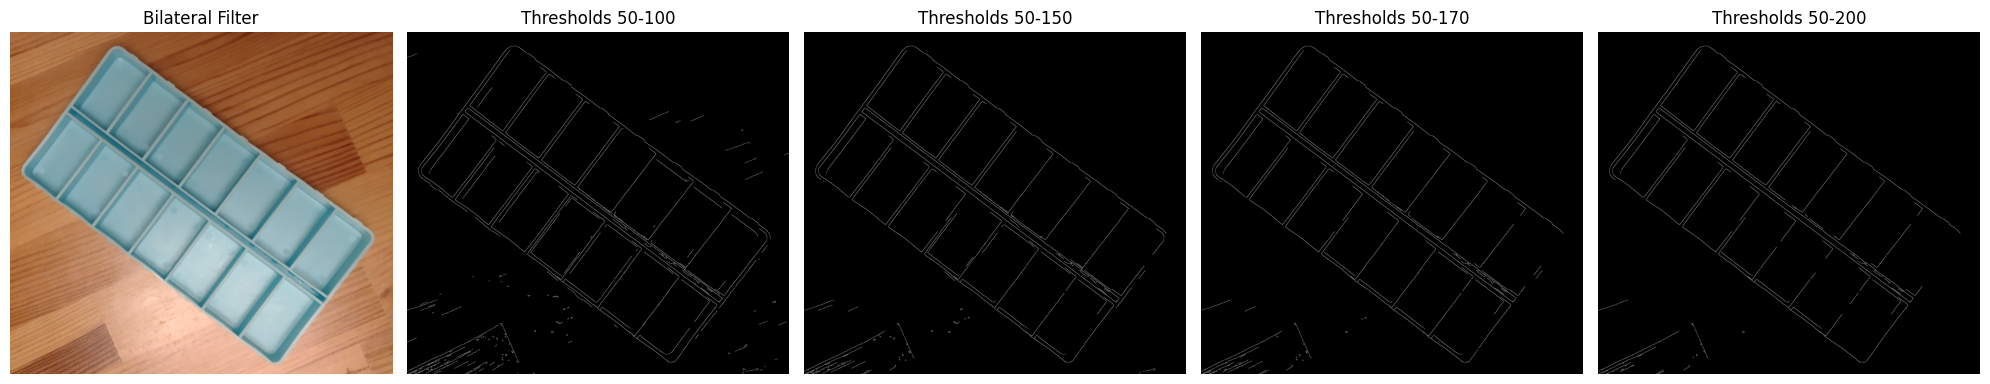

In [186]:
bilateral_filtered = cv2.bilateralFilter(pillbox, 7, 50, 50)

thresholds = [(50,100),(50, 150), (50, 170), (50, 200)]

bilateral_results = [cv2.Canny(bilateral_filtered, low, high) for low, high in thresholds]

fig, axs = plt.subplots(1, len(thresholds) + 1, figsize=(20, 5))

axs[0].imshow(cv2.cvtColor(bilateral_filtered, cv2.COLOR_BGR2RGB))
axs[0].set_title('Bilateral Filter')
axs[0].axis('off')

for i, (edges, (low, high)) in enumerate(zip(bilateral_results, thresholds)):
    axs[i + 1].imshow(edges, cmap='gray')
    axs[i + 1].set_title(f'Thresholds {low}-{high}')
    axs[i + 1].axis('off')

plt.tight_layout()
plt.show()

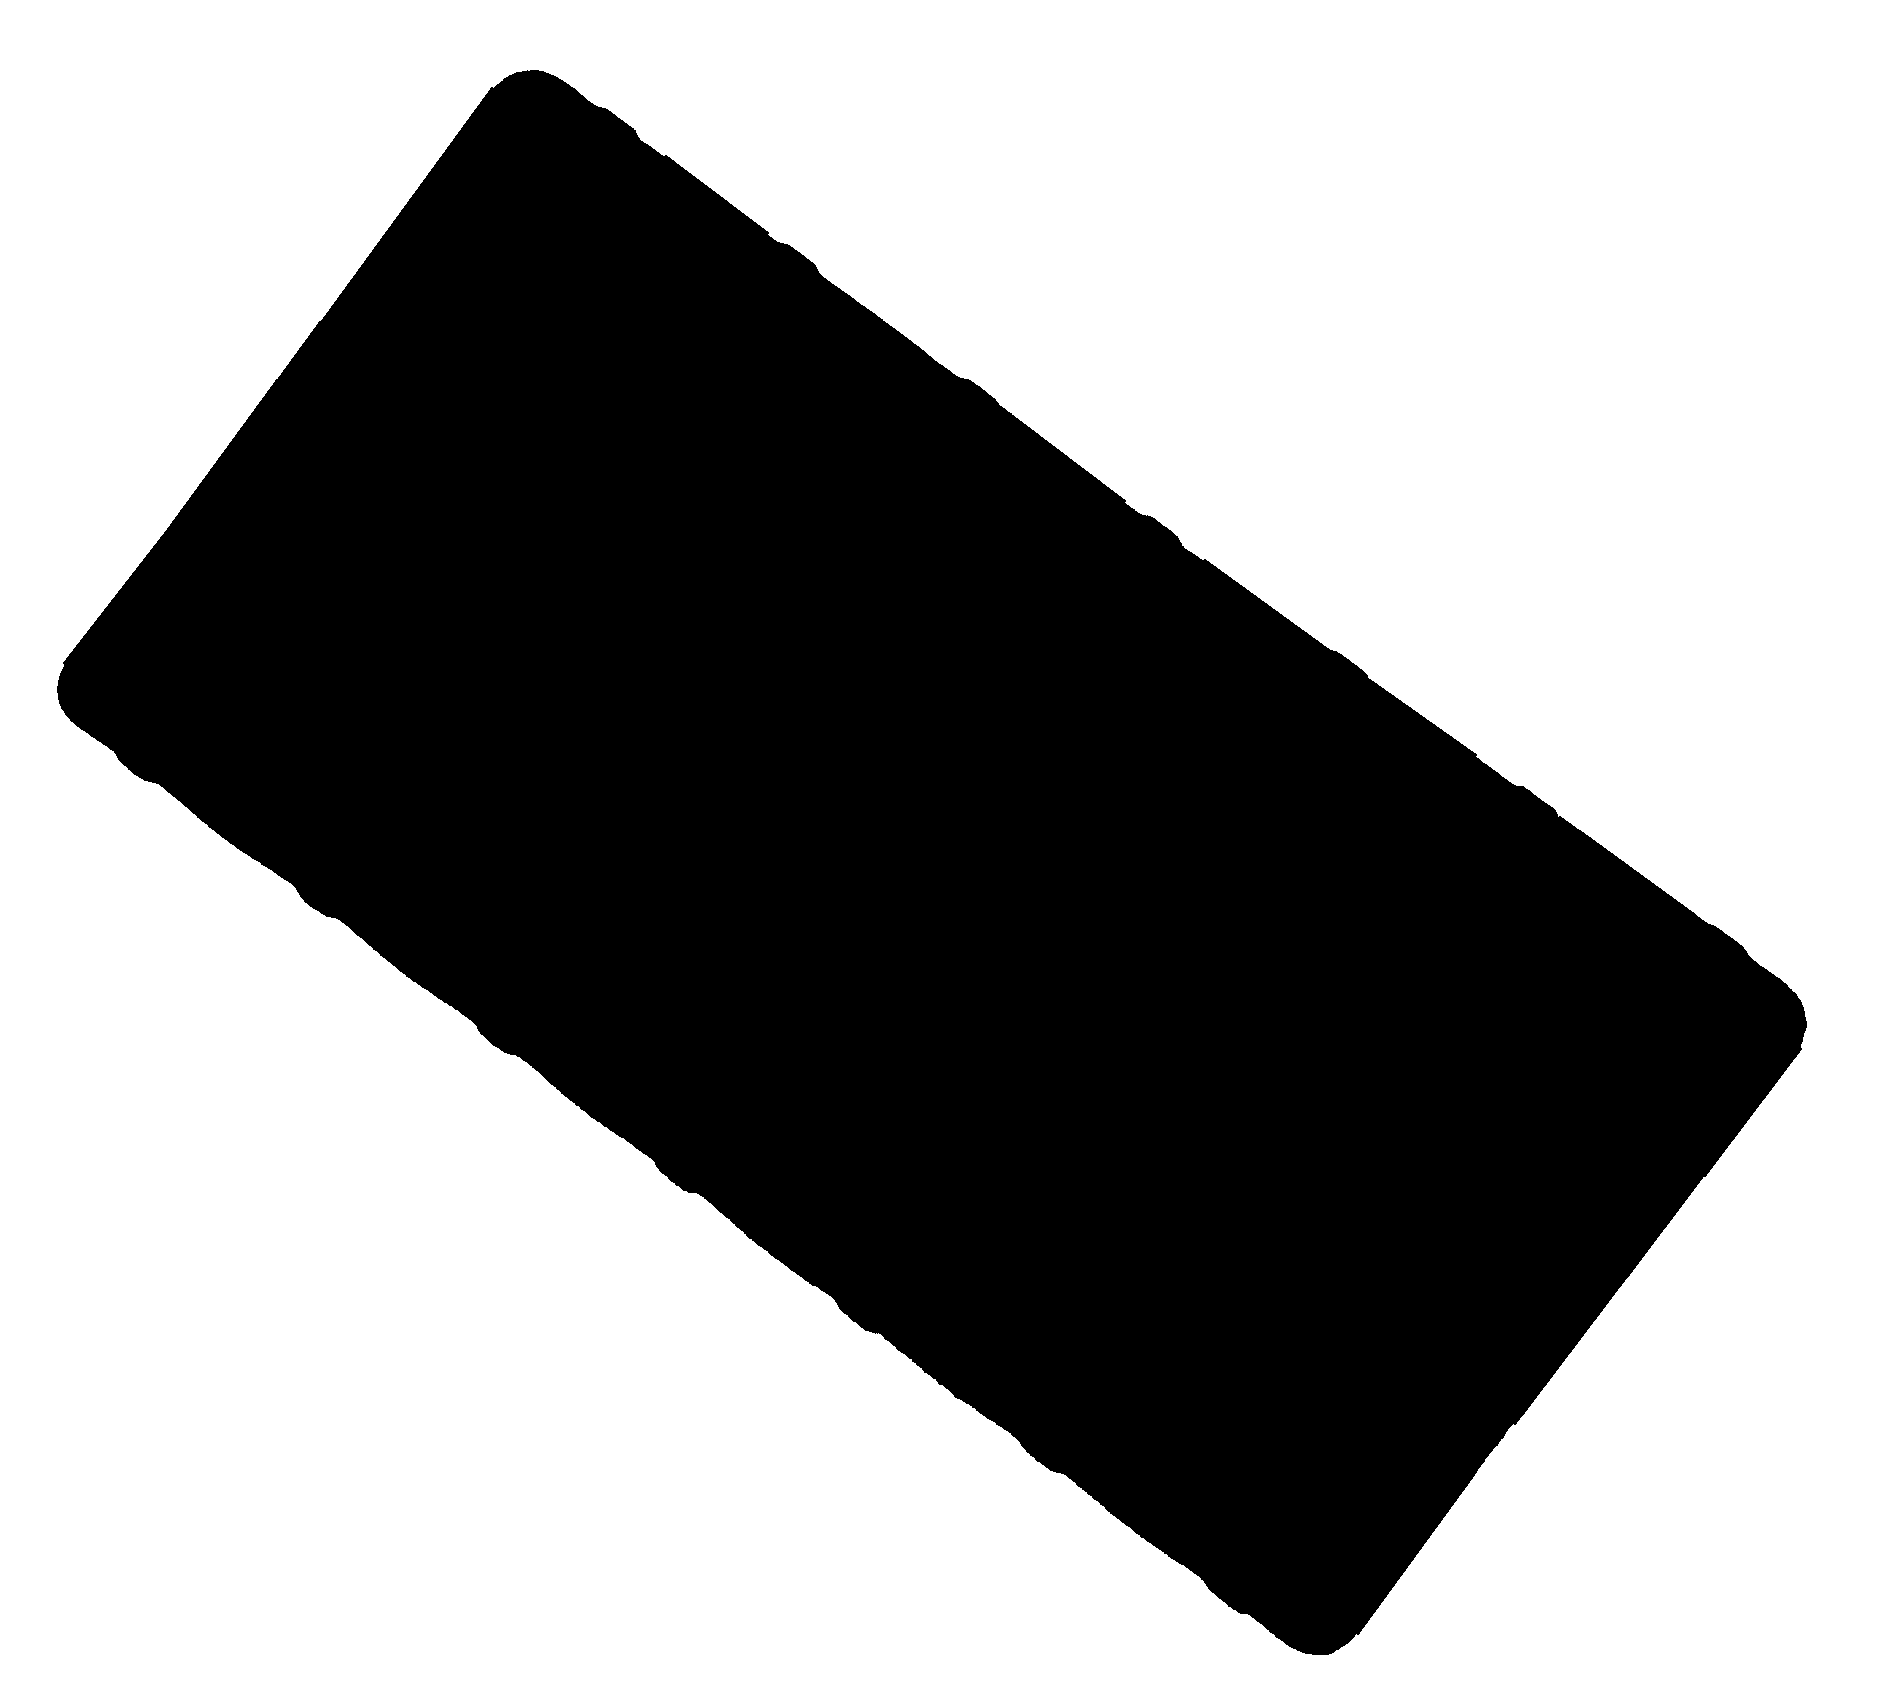

In [192]:
hsv = cv2.cvtColor(pillbox, cv2.COLOR_BGR2HSV)

lower_red1 = np.array([0, 60, 50])
upper_red1 = np.array([25, 255, 255])
lower_red2 = np.array([170, 60, 50])
upper_red2 = np.array([180, 255, 255])

mask_red1 = cv2.inRange(hsv, lower_red1, upper_red1)
mask_red2 = cv2.inRange(hsv, lower_red2, upper_red2)
mask_red = cv2.bitwise_or(mask_red1, mask_red2)

mask_non_red = cv2.bitwise_not(mask_red)

binary_image = np.where(mask_red>0, 255, 0).astype(np.uint8)

Image.fromarray(binary_image)

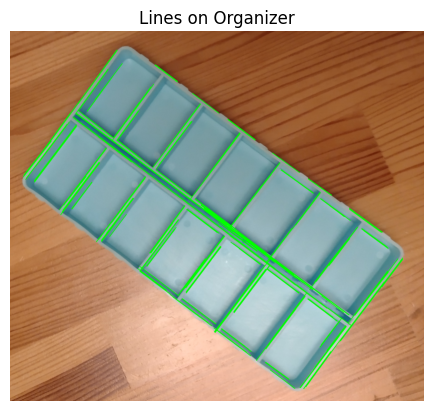

In [193]:
gray = cv2.cvtColor(pillbox, cv2.COLOR_BGR2GRAY)

masked_gray = cv2.bitwise_and(gray, gray, mask=mask_non_red)

edges = cv2.Canny(masked_gray, 50, 100, apertureSize=3)

lines = cv2.HoughLinesP(edges, 0.9, np.pi / 180, 50, minLineLength=100, maxLineGap=10)

for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(pillbox, (x1, y1), (x2, y2), (0, 255, 0), 2)

pillbox_rgb = cv2.cvtColor(pillbox, cv2.COLOR_BGR2RGB)

plt.imshow(pillbox_rgb)
plt.title('Lines on Organizer')
plt.axis('off')
plt.show()